<a href="https://colab.research.google.com/github/Pragu3704/chromosome_abnormality_detector/blob/main/chromosome_abnormality_detection_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Counting total number of images in each folder

In [ ]:
import os

# Define the dataset directory
dp = "/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/"

# Define the two specific folders to count images from
folder1 = "/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG"
folder2 = "/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/single_chromosomes_object/JEPG"

# Function to count images in a given folder
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.jpeg')])

# Count total images in dataset
total_images = len([f for f in os.listdir(dp) if f.endswith('.jpg') or f.endswith('.jpeg')])

# Count images in the specified folders
folder1_path = os.path.join(dp, folder1)
folder2_path = os.path.join(dp, folder2)

folder1_count = count_images(folder1_path) if os.path.isdir(folder1_path) else 0
folder2_count = count_images(folder2_path) if os.path.isdir(folder2_path) else 0

# Print counts
print(f"Total Images in Dataset: {total_images}")
print(f"Images in {folder1}: {folder1_count}")
print(f"Images in {folder2}: {folder2_count}")

Total Images in Dataset: 0
Images in /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG: 5000
Images in /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/single_chromosomes_object/JEPG: 2000


#Finding the folders the images need to be in according to the tags in train.txt, test.txt and diff_image.txt

In [ ]:
def load_ids_from_txt(file_path):
    with open(file_path, 'r') as f:
        return set(f.read().splitlines())

# Define paths
base_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/"
train_txt_path = os.path.join(base_path, "train.txt")
test_txt_path = os.path.join(base_path, "test.txt")
diff_txt_path = os.path.join(base_path, "diff_image.txt")

# Load image IDs from text files
train_ids = load_ids_from_txt(train_txt_path)
test_ids = load_ids_from_txt(test_txt_path)
diff_ids = load_ids_from_txt(diff_txt_path)

# Find where each image is located
image_locations = {}
image_folder = os.path.join(base_path, "images")

for img_file in os.listdir('/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/single_chromosomes_object/JEPG'):
    if img_file.endswith('.jpg') or img_file.endswith('.jpeg'):
        img_id = os.path.splitext(img_file)[0]  # Remove file extension
        if img_id in train_ids:
            image_locations[img_file] = "Train"
        elif img_id in test_ids:
            image_locations[img_file] = "Test"
        elif img_id in diff_ids:
            image_locations[img_file] = "Difficult Images"
        else:
            image_locations[img_file] = "Unknown"

# Print a sample of locations
for img, loc in list(image_locations.items()):  # Print first 10 entries
    print(f"Image: {img} -> Location: {loc}")

Image: 1053721.jpg -> Location: Test
Image: 1053163.jpg -> Location: Test
Image: 1054051.jpg -> Location: Test
Image: 1053362.jpg -> Location: Test
Image: 1053522.jpg -> Location: Test
Image: 1053271.jpg -> Location: Test
Image: 1054072.jpg -> Location: Train
Image: 1053842.jpg -> Location: Test
Image: 1053612.jpg -> Location: Test
Image: 1053532.jpg -> Location: Train
Image: 1053953.jpg -> Location: Test
Image: 1054022.jpg -> Location: Test
Image: 1053791.jpg -> Location: Test
Image: 1053281.jpg -> Location: Test
Image: 1053164.jpg -> Location: Test
Image: 1053671.jpg -> Location: Test
Image: 1053431.jpg -> Location: Train
Image: 1053553.jpg -> Location: Train
Image: 1053322.jpg -> Location: Train
Image: 1053223.jpg -> Location: Test
Image: 1053422.jpg -> Location: Test
Image: 1053102.jpg -> Location: Test
Image: 1053642.jpg -> Location: Test
Image: 1053884.jpg -> Location: Test
Image: 1053961.jpg -> Location: Test
Image: 1053544.jpg -> Location: Test
Image: 1053241.jpg -> Location: T

In [ ]:
def load_ids_from_txt(file_path):
    with open(file_path, 'r') as f:
        return set(f.read().splitlines())

# Define paths
base_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/"
train_txt_path = os.path.join(base_path, "train.txt")
test_txt_path = os.path.join(base_path, "test.txt")
diff_txt_path = os.path.join(base_path, "diff_image.txt")

# Load image IDs from text files
train_ids = load_ids_from_txt(train_txt_path)
test_ids = load_ids_from_txt(test_txt_path)
diff_ids = load_ids_from_txt(diff_txt_path)

# Find where each image is located
image_locations = {}
image_folder = os.path.join(base_path, "images")

for img_file in os.listdir('/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG'):
    if img_file.endswith('.jpg') or img_file.endswith('.jpeg'):
        img_id = os.path.splitext(img_file)[0]  # Remove file extension
        if img_id in train_ids:
            image_locations[img_file] = "Train"
        elif img_id in test_ids:
            image_locations[img_file] = "Test"
        elif img_id in diff_ids:
            image_locations[img_file] = "Difficult Images"
        else:
            image_locations[img_file] = "Unknown"

# Print a sample of locations
for img, loc in list(image_locations.items()):
    print(f"Image: {img} -> Location: {loc}")

Image: 1100032.jpg -> Location: Train
Image: 1091333.jpg -> Location: Train
Image: 1091144.jpg -> Location: Train
Image: 1091093.jpg -> Location: Train
Image: 1081004.jpg -> Location: Train
Image: 1091382.jpg -> Location: Train
Image: 1080952.jpg -> Location: Train
Image: 1080874.jpg -> Location: Train
Image: 1080992.jpg -> Location: Train
Image: 1091672.jpg -> Location: Train
Image: 1091351.jpg -> Location: Train
Image: 1091471.jpg -> Location: Train
Image: 1080924.jpg -> Location: Train
Image: 1091465.jpg -> Location: Train
Image: 1091235.jpg -> Location: Train
Image: 1091655.jpg -> Location: Train
Image: 1091681.jpg -> Location: Train
Image: 1091586.jpg -> Location: Train
Image: 1091524.jpg -> Location: Train
Image: 1080942.jpg -> Location: Train
Image: 1091343.jpg -> Location: Train
Image: 1091463.jpg -> Location: Train
Image: 1100031.jpg -> Location: Train
Image: 1091232.jpg -> Location: Train
Image: 1091042.jpg -> Location: Train
Image: 1091053.jpg -> Location: Train
Image: 10809

# Counting the number of images that are difficult to analyse

In [ ]:
import os
import pandas as pd

# Define base dataset path
base_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/"
image_folder_1 = os.path.join(base_path, "24_chromosomes_object/JEPG")
image_folder_2 = os.path.join(base_path, "single_chromosomes_object/JEPG")
diff_txt_path = os.path.join(base_path, "diff_image.txt")

# Load diff image IDs
def load_ids_from_txt(file_path):
    with open(file_path, 'r') as f:
        return set(f.read().splitlines())

diff_ids = load_ids_from_txt(diff_txt_path)

# Function to find difficult-to-analyze images in a given directory
def find_diff_images(directory):
    return sum(1 for img_file in os.listdir(directory) if (img_file.endswith('.jpg') or img_file.endswith('.jpeg')) and os.path.splitext(img_file)[0] in diff_ids)

# Find difficult images in both directories
diff_count_1 = find_diff_images(image_folder_1)
diff_count_2 = find_diff_images(image_folder_2)

# Print results
print(f"Total Diff Images Found in {image_folder_1}: {diff_count_1}")
print(f"Total Diff Images Found in {image_folder_2}: {diff_count_2}")

Total Diff Images Found in /content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG: 122
Total Diff Images Found in /content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/single_chromosomes_object/JEPG: 93


# Visualising some difficult to analyse images

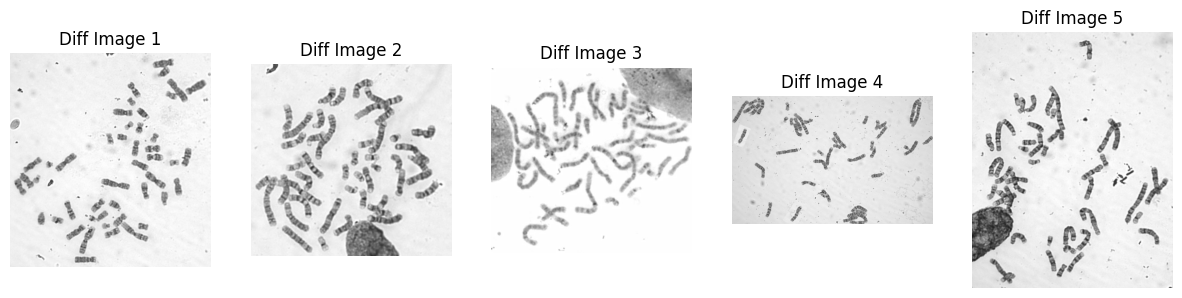

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Define dataset location
base_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/"
image_folder = os.path.join(base_path, "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG/")
diff_txt_path = os.path.join(base_path, "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/diff_image.txt")

# Load diff image IDs
def load_ids_from_txt(file_path):
    with open(file_path, 'r') as f:
        return set(f.read().splitlines())

diff_ids = load_ids_from_txt(diff_txt_path)

# Find the file paths for diff images
diff_image_paths = []
for img_file in os.listdir(image_folder):
    if img_file.endswith('.jpg') or img_file.endswith('.jpeg'):
        img_id = os.path.splitext(img_file)[0]  # Remove file extension
        if img_id in diff_ids:
            diff_image_paths.append(os.path.join(image_folder, img_file))

# Display a few images (adjust number as needed)
num_images_to_show = min(5, len(diff_image_paths))  # Show up to 5 images
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))

for i in range(num_images_to_show):
    img = cv2.imread(diff_image_paths[i])  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (for correct colors)

    axes[i].imshow(img)
    axes[i].set_title(f"Diff Image {i+1}")
    axes[i].axis("off")  # Hide axes

plt.show()


# Merging csvs to create a combined dataset

In [ ]:
import pandas as pd

# Define file paths (Update to match your Drive paths)
base_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/"

normal_csv = os.path.join(base_path, "normal.csv")
structure_abnormal_csv = os.path.join(base_path, "structural_abnormalities.csv")
number_abnormal_csv = os.path.join(base_path, "number_abnormalities.csv")

# Load CSV files
normal_df = pd.read_csv(normal_csv)
structure_abnormal_df = pd.read_csv(structure_abnormal_csv)
number_abnormal_df = pd.read_csv(number_abnormal_csv)

# Concatenate all datasets
merged_df = pd.concat([normal_df, structure_abnormal_df, number_abnormal_df], ignore_index=True)

# Print basic info
print("Merged Dataset Info:")
print(merged_df.info())

# Show first few rows
print(merged_df.head())

# Save the merged dataset as a new CSV file
merged_csv_path = os.path.join(base_path, "merged_karyotype_data.csv")
merged_df.to_csv(merged_csv_path, index=False)

print(f"\nMerged dataset saved to: {merged_csv_path}")


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   filename                                5002 non-null   object
 1   chromosome numbers                      5002 non-null   int64 
 2   description                             99 non-null     object
 3   description (abnormal chromosome-pair)  107 non-null    object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None
     filename  chromosome numbers description  \
0  104011.jpg                  46         NaN   
1  104013.jpg                  46         NaN   
2  104022.jpg                  46         NaN   
3  104023.jpg                  46         NaN   
4  104024.jpg                  46         NaN   

  description (abnormal chromosome-pair)  
0                                    NaN  
1                          

#Looking for repeated files

In [ ]:
# Define base dataset path
base_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/"
image_folder_1 = os.path.join(base_path, "24_chromosomes_object/JEPG")
image_folder_2 = os.path.join(base_path, "single_chromosomes_object/JEPG")

# List of folders to search
folders = [image_folder_1, image_folder_2]

# Function to find repeated files with _1 in their name
def find_repeated_files(folders):
    repeated_files = []

    for folder in folders:
        for filename in os.listdir(folder):
            if "_1" in filename and filename.endswith(".jpg"):
                repeated_files.append(filename)

    return repeated_files

# Find repeated files in both directories
repeated_files = find_repeated_files(folders)

# Print results
print("Repeated Files with _1 in their name:")
for file in repeated_files:
    print(file)

Repeated Files with _1 in their name:
1050241_1.jpg
1050233_1.jpg
1050273_1.jpg
1050212_1.jpg
1050282_1.jpg
1050225_1.jpg
1050261_1.jpg
1050224_1.jpg
1050231_1.jpg
1050252_1.jpg
1050244_1.jpg
1050302_1.jpg
1050221_1.jpg
1050292_1.jpg
1050281_1.jpg
1050242_1.jpg
1050253_1.jpg
1050291_1.jpg
1050232_1.jpg
1050213_1.jpg
1050211_1.jpg
1050272_1.jpg
1050251_1.jpg
1050301_1.jpg
1050223_1.jpg
1050222_1.jpg
1050271_1.jpg
1050303_1.jpg
1050351_1.jpg
1050362_1.jpg
1050324_1.jpg
1050332_1.jpg
1050323_1.jpg
1050342_1.jpg
1050312_1.jpg
1050352_1.jpg
1050363_1.jpg
1050343_1.jpg
1050322_1.jpg
1050321_1.jpg


#Deleted repeated files





In [ ]:
import os

# Define the paths to the three folders
folder_1 = '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG'
folder_2 = '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/single_chromosomes_object/JEPG'

# List of folders to check
folders = [folder_1, folder_2]

def remove_repeated_files(folders):
    for folder in folders:
        # Iterate through files in the folder
        for filename in os.listdir(folder):
            # Check if the file has _1 in its name and ends with .jpg
            if "_1" in filename and filename.endswith(".jpg"):
                # Get the original file name by removing the _1 suffix
                original_filename = filename.replace('_1', '')
                original_path = os.path.join(folder, original_filename)
                repeated_path = os.path.join(folder, filename)

                # Check if the original file exists in the same folder
                if os.path.exists(original_path):
                    print(f"Deleting repeated file: {repeated_path}")
                    os.remove(repeated_path)  # Delete the repeated file

# Call the function to remove repeated files
remove_repeated_files(folders)

Deleting repeated file: /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG/1050241_1.jpg
Deleting repeated file: /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG/1050233_1.jpg
Deleting repeated file: /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG/1050273_1.jpg
Deleting repeated file: /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG/1050212_1.jpg
Deleting repeated file: /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG/1050282_1.jpg
Deleting repeated file: /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG/1050261_1.jpg
Deleting repeated file: /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG/1050224_1.jpg
Deleting repeated file: /content/drive/My Drive/

# Cleaning txt files to remove repeated ids

In [5]:
def remove_entries(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Filter out lines ending with '_1'
    filtered_lines = [line for line in lines if not line.strip().endswith('_1')]

    with open(file_path, 'w') as file:
        file.writelines(filtered_lines)

# List of files to process
files = ['/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/train.txt', '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/test.txt', '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/diff_image.txt']

for file in files:
    remove_entries(file)

print("Entries ending with '_1' removed successfully.")


Entries ending with '_1' removed successfully.


# Allocating images to train, test and diff_image set based on txt file enteries

In [6]:
import os
import shutil

# Define paths
base_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data"
source_24_folder = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/24_chromosomes_object/JEPG"
source_single_folder = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/single_chromosomes_object/JEPG"

train_txt_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/train.txt"
test_txt_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/test.txt"
diff_txt_path = "/content/drive/MyDrive/Kaggle/chromosome-image-dataset-karyotype/Data/diff_image.txt"

# Create the destination folders (train, test, diff_image)
train_folder = os.path.join(base_path, "train")
test_folder = os.path.join(base_path, "test")
diff_image_folder = os.path.join(base_path, "diff_image")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(diff_image_folder, exist_ok=True)

# Function to load image IDs from txt file
def load_ids_from_txt(file_path):
    with open(file_path, 'r') as f:
        return set(f.read().splitlines())

# Load image IDs from the text files
train_ids = load_ids_from_txt(train_txt_path)
test_ids = load_ids_from_txt(test_txt_path)
diff_ids = load_ids_from_txt(diff_txt_path)

# Helper function to copy image files to the appropriate folder
def copy_images(image_ids, source_folder, dest_folder):
    for img_file in os.listdir(source_folder):
        if img_file.endswith('.jpg') or img_file.endswith('.jpeg'):
            img_id = os.path.splitext(img_file)[0]  # Remove file extension
            if img_id in image_ids:
                src_img_path = os.path.join(source_folder, img_file)
                dst_img_path = os.path.join(dest_folder, img_file)
                shutil.copy(src_img_path, dst_img_path)

# Copy images to the corresponding folders
print("Copying images to 'train' folder...")
copy_images(train_ids, source_24_folder, train_folder)
copy_images(train_ids, source_single_folder, train_folder)

print("Copying images to 'test' folder...")
copy_images(test_ids, source_24_folder, test_folder)
copy_images(test_ids, source_single_folder, test_folder)

print("Copying images to 'diff_image' folder...")
copy_images(diff_ids, source_24_folder, diff_image_folder)
copy_images(diff_ids, source_single_folder, diff_image_folder)

print("Image organization complete!")


Copying images to 'train' folder...
Copying images to 'test' folder...
Copying images to 'diff_image' folder...
Image organization complete!


# Splitting the combined csv to train, test and diff_image.csv

In [7]:
import os
import pandas as pd

# Define paths to your train, test, and diff_image folders
train_folder = '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/train'
test_folder = '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/test'
diff_image_folder = '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/diff_image'

# Define the path to your combined CSV
combined_csv_path = '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/cleaned_karyotype_data.csv'

# Read the combined CSV into a DataFrame
df = pd.read_csv(combined_csv_path)

# Check the first few rows to confirm the structure
print("First few rows of the CSV:")
print(df.head())

# Get the list of image files from each folder (remove file extensions for matching)
train_images = {f.replace('.jpg', '') for f in os.listdir(train_folder) if f.endswith('.jpg')}
test_images = {f.replace('.jpg', '') for f in os.listdir(test_folder) if f.endswith('.jpg')}
diff_image_images = {f.replace('.jpg', '') for f in os.listdir(diff_image_folder) if f.endswith('.jpg')}

# Extract the image_ids (filenames) from the 'filename' column of the CSV
image_ids_in_csv = df['filename'].str.replace('.jpg', '').unique()

# Split the DataFrame into three based on the matching image IDs
train_df = df[df['filename'].str.replace('.jpg', '').isin(train_images)]
test_df = df[df['filename'].str.replace('.jpg', '').isin(test_images)]
diff_image_df = df[df['filename'].str.replace('.jpg', '').isin(diff_image_images)]

# Save the DataFrames into separate CSV files
train_df.to_csv('/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/train/train.csv', index=False)
test_df.to_csv('/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/test/test.csv', index=False)
diff_image_df.to_csv('/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/diff_image/diff_image.csv', index=False)

print("CSV files have been split and saved successfully!")


First few rows of the CSV:
     filename  chromosome numbers structure abnormality number abnormality  \
0  104011.jpg                  46                    no                 no   
1  104013.jpg                  46                    no                 no   
2  104022.jpg                  46                    no                 no   
3  104023.jpg                  46                    no                 no   
4  104024.jpg                  46                    no                 no   

  condition  
0   healthy  
1   healthy  
2   healthy  
3   healthy  
4   healthy  
CSV files have been split and saved successfully!


# Checking if number of enteries are the same

In [12]:
import os

def count_entries(file_path):
    with open(file_path, 'r') as file:
        return sum(1 for _ in file)

def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if not f.endswith('.csv')])

csv_files = ['/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/train/train.csv', '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/test/test.csv', '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/diff_image/diff_image.csv']


total_entries = 0
for file in csv_files:
    entries = count_entries(file)
    total_entries += entries
    print(f"Number of entries in {file}: {entries}")


image_folders = {'train': '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/train/', 'test': '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/test/', 'diff_image': '/content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/diff_image/'}

for folder_name, folder_path in image_folders.items():
    print(f"Number of images in {folder_name}: {count_images(folder_path)}")

Number of entries in /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/train/train.csv: 3745
Number of entries in /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/test/test.csv: 1209
Number of entries in /content/drive/My Drive/Kaggle/chromosome-image-dataset-karyotype/Data/diff_image/diff_image.csv: 117
Number of images in train: 3744
Number of images in test: 1208
Number of images in diff_image: 116
